In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def abrirArquivo(path,faixa,renomear):
    df = pd.read_excel(path)
    return df


def gerarTabela(df,coluna,faixa,groupby):
    df = df.query(f'`{coluna}` == {faixa}')
    df = df.groupby(groupby).sum(numeric_only = True)
    df.insert(2,'% Tórax',((df['RX Tórax']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.insert(4,'% RX Face',((df['RX de seios da face']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.insert(6,'% TC',((df['TC']/df['Atendimentos'])*100).round(1).astype(str)+'%')
    df.drop(columns=['Mês'],inplace=True)
    return df

def graficoDeLinha(df,agrupar):
    df = df.groupby(agrupar).sum(numeric_only=True).reset_index()
    plt.plot(df['Mês'], df['RX Tórax'], label = "RX Tórax")
    plt.plot(df['Mês'], df['RX de seios da face'], label = "RX de seios da face")
    plt.plot(df['Mês'], df['TC'], label = "TC")
    plt.legend()
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de Exames')
    plt.xticks(df['Mês'])
    plt.title('Gráfico do total mensal para cada tipo de exame')
    return plt.show()

def graficoDeColuna(df,agrupar):
    df = df.groupby(agrupar).sum(numeric_only=True)
    df[['RX Tórax','RX de seios da face','TC']].plot(kind="bar")
    plt.ylabel('Quantidade de Exames')
    plt.title('Gráfico de coluna de atendimento por ano')
    return plt.show()

def grafico2(df):
    faixas = [['0-4 anos'], ['5-8 anos'],['9-12 anos']]
    fig,ax = plt.subplots(1,3,sharey=True,figsize= (20,10))
    atual = 0
    plt.setp(ax,xticks=df['Mês'],xlabel=('Mês'))
    for i in faixas: 
        ax[atual].set_title(i[0])
        inter = df.query(f'`Faixa etária` == {i}')
        inter = inter.groupby('Mês').sum(numeric_only=True).reset_index()
        ax[atual].plot(inter['Mês'], inter['RX Tórax'], label = "RX Tórax")
        ax[atual].plot(inter['Mês'], inter['RX de seios da face'], label = "RX de seios da face")
        ax[atual].plot(inter['Mês'], inter['TC'], label = "TC")
        atual += 1
    plt.legend()
    plt.suptitle('Gráfico de linha do total mensal para cada faixa etária por tipo de exame')

    ax[0].set_ylabel('Quantidade de Exames')
    return plt.show()    


def scatter(df):
    faixas = [['0-4 anos'], ['5-8 anos'],['9-12 anos']]
    for i in faixas:
        inter = df.query(f'`Faixa etária` == {i}')
        inter = inter.groupby('Mês').sum(numeric_only=True).reset_index()
        corr = (np.corrcoef(inter['RX Tórax'],inter['Atendimentos'])[0,1]).round(2)
        plt.scatter(inter['RX Tórax'], inter['Atendimentos'], label = f'{i[0]} correlação = {corr}')
    plt.xlabel('Quantidade RX Tórax por mês')
    plt.ylabel('Quantidade Atendimentos por mês')
    plt.legend()
    plt.title('Gráfico de dispersão de atendimentos por RX tórax agrupado por faixa etária')
    
    return plt.show()

def scatterAll(df):
    plt.scatter(df['RX Tórax'],df['Atendimentos'])
    plt.xlabel('Quantidade RX Tórax')
    plt.ylabel('Quantidade Atendimentos')
    correlação = (np.corrcoef(df['RX Tórax'],df['Atendimentos'])[0,1]).round(2)
    print(f"o coeficiente de correlação total é {correlação}")
    plt.title('Gráfico de dispersão de atendimentos por RX Tórax')
    return plt.show()
tabela = abrirArquivo('pediatria.xlsx',1,1)


# Criar tabela faixa 0-4 anos

In [2]:
gerarTabela(tabela.copy(),'Faixa etária',['0-4 anos'],'Ano')

,RX Tórax,% Tórax,RX de seios da face,% RX Face,TC,% TC,Atendimentos
Ano,,,,,,,
2018,1381,10.5%,208,1.6%,21,0.2%,13208
2019,1150,8.4%,152,1.1%,30,0.2%,13704


# Criar tabela faixa 5-8 anos

In [3]:
gerarTabela(tabela.copy(),'Faixa etária',['5-8 anos'],'Ano')

,RX Tórax,% Tórax,RX de seios da face,% RX Face,TC,% TC,Atendimentos
Ano,,,,,,,
2018,246,5.2%,114,2.4%,11,0.2%,4699
2019,252,4.6%,90,1.6%,7,0.1%,5470


# Criar tabela faixa 9-12 anos

In [4]:
gerarTabela(tabela.copy(),'Faixa etária',['9-12 anos'],'Ano')

,RX Tórax,% Tórax,RX de seios da face,% RX Face,TC,% TC,Atendimentos
Ano,,,,,,,
2018,103,3.5%,58,2.0%,16,0.5%,2957
2019,153,4.4%,71,2.0%,8,0.2%,3471


# Grafico  total  mensal  para  cada  tipo  de  exame

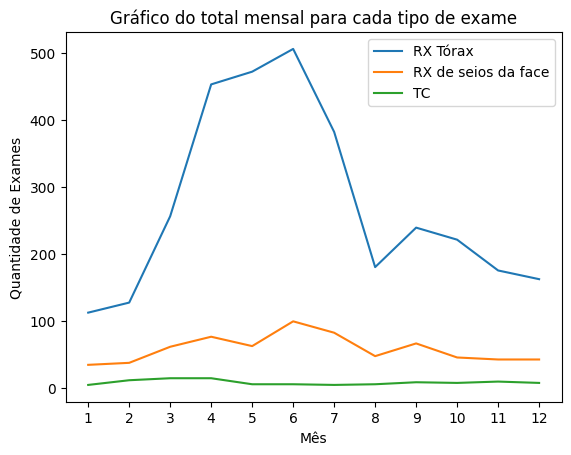

In [5]:
graficoDeLinha(tabela.copy(),'Mês')


# total  mensal por exame para  cada  faixa  etária

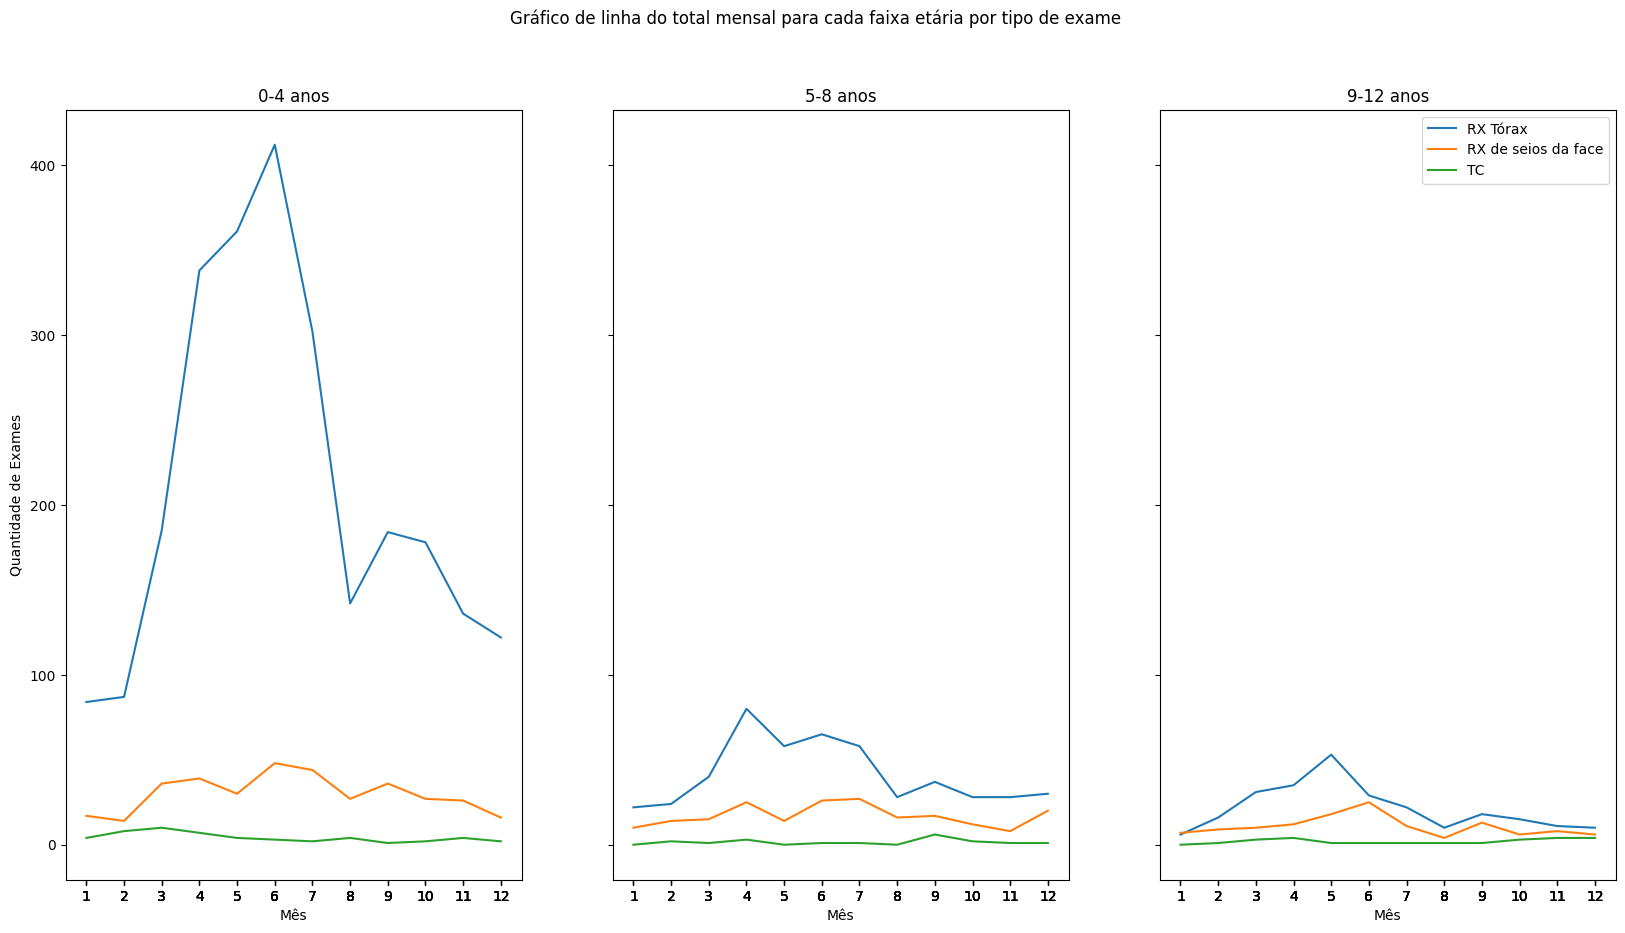

In [6]:
grafico2(tabela.copy())

# Grafico de coluna de atendimento por ano

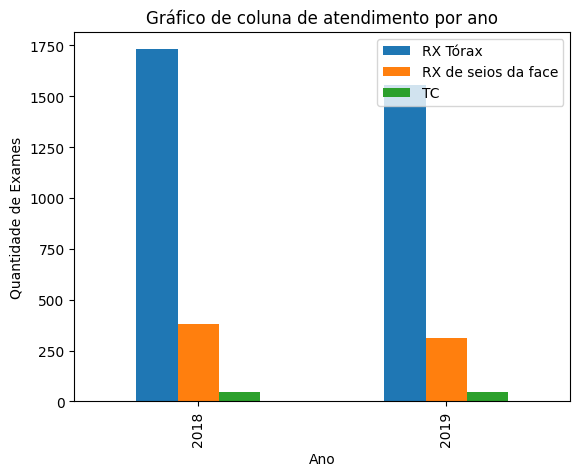

In [7]:
graficoDeColuna(tabela.copy(),'Ano')

# Dispersão de Rx de Torax por quantiade de atendimento por faixa etária

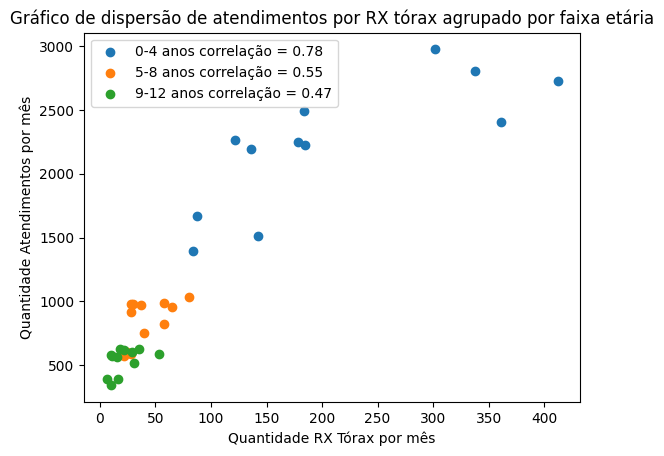

o coeficiente de correlação total é 0.86


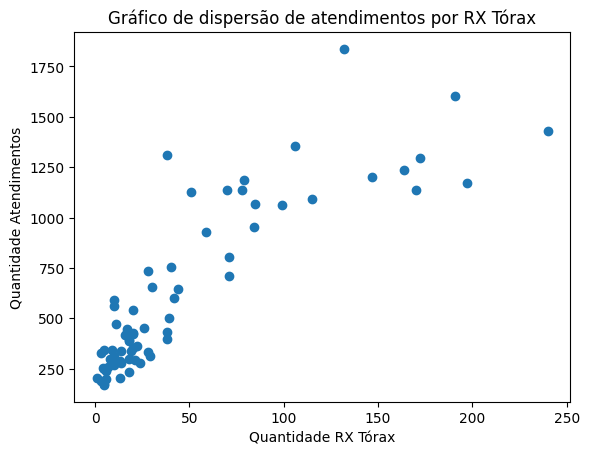

In [8]:
scatter(tabela.copy())
scatterAll(tabela.copy())